# ***Atividade em aula***

# Exercício 1

Em 95% dos casos, uma certa doença pode ser curada através de um procedimento cirúrgico. Se sorteamos 20 pacientes que possuem essa doença e os submetemos à cirurgia. Tratando o resultado (cura ou não cura) de cada um desses pacientes como eventos independentes, 

1. Qual a probabilidade de todos os pacientes serem curados da doença?
2. Qual a probabilidade de nenhum dos pacientes ser curado da doença?
3. Qual a probabilidade de ao menos 15 pacientes serem curados da doença?

In [1]:
from scipy.stats import binom

p = 0.95
qtd = 20
todos_curados = (p)**qtd

print("Chance de todos se curarem: ", todos_curados)

nenhum_curado = (1 - p)**qtd

print("Chance de nenhum se curar:  ", nenhum_curado)

curados_15 = sum(binom.pmf(k, qtd, p) for k in range(15, qtd + 1))

print("Chance de ao menos 15 se curarem:  ", curados_15)

Chance de todos se curarem:  0.3584859224085419
Chance de nenhum se curar:   9.536743164062669e-27
Chance de ao menos 15 se curarem:   0.9996707056754719


# Exercício 2

Um laboratório admite que o número de partículas emitidas em um minuto por certo material radioativo A tem função de probabilidade Poisson com parâmetro $\mu_A = 4$.

1. Produza um gráfico da função de probabilidade Poisson com parâmetro $\mu_A = 4$.

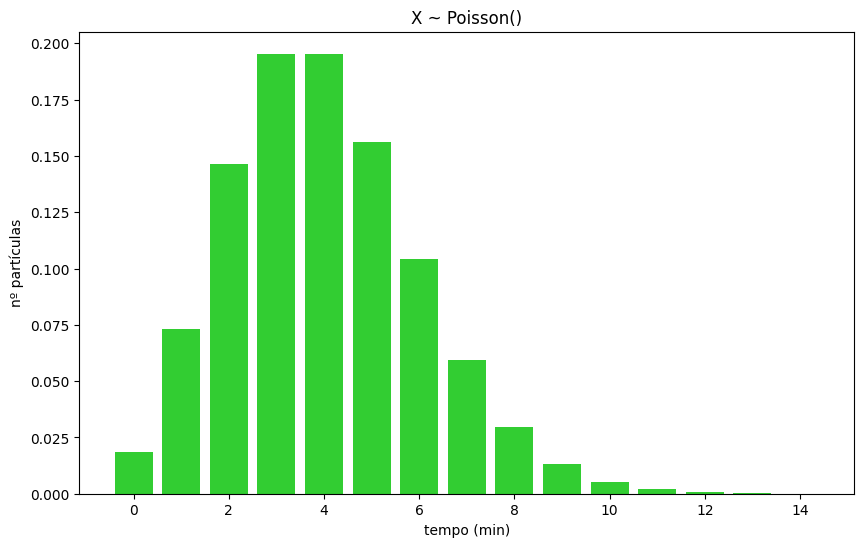

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

muA = 4
x = np.arange(0, 15)

probabilities = poisson.pmf(x, muA)


plt.figure(figsize=(10, 6))
plt.bar(x, probabilities, color='limegreen')

plt.title('X ~ Poisson()')
plt.xlabel('tempo (min)')
plt.ylabel('nº partículas')
plt.show()

2. Qual a probabilidade que, em dado minuto, mais de 6 partículas sejam emitidas pelo material A?

In [3]:
probabilty = 1 - poisson.cdf(6, muA)
print(f'Probabilidade de A emitir mais de 6 partículas em 1 minuto: {probabilty}')

Probabilidade de A emitir mais de 6 partículas em 1 minuto: 0.11067397840257365


3. Para um outro material B, a emissão de partículas por minuto tem função de probabilidade Poisson com parâmetro $\mu_B = 0.7$. Em dado minuto, qual a probabilidade de nenhum dos materiais emitir partícula alguma. Considere a emissão de partículas pelos materiais como variáveis independentes.

In [4]:
muB = 0.7

probA = poisson.pmf(0, muA)
probB = poisson.pmf(0, muB)

# Por serem variáveis indepentes, a probabilidade da interseção dos eventos é seu produto

prob = probA * probB

print(f'Probabilidade de nenhum material emitir partículas em 1 minuto: {prob}')

Probabilidade de nenhum material emitir partículas em 1 minuto: 0.009095277101695817


# Exercício 3

A distribuição geométrica possui a propriedade de "perda de memória".

1. Pesquise e explique com suas palavras o que significa a propriedade de "perda de memória" (memorylessness).
2. Qual a distribuição contínua que também possui a propriedade de "perda de memória".
3. Crie um exemplo prático que ilustre a propriedade de "perda de memória".

1. A perda de memória indica que a probabilidade de obter um sucesso depois de n fracassos sucessivos é a mesma independente de n. Ou seja, a probabilidade de obter um sucesso no próximo evento não é afetada pela quantidade de fracassos que já aconteceram.
2. A distribuição exponencial
3. Se uma pessoa joga uma moeda 10 vezes e todas as vezes ela obtém "cara", a chance de obter cara na próxima jogada ainda é 50%. Acreditar que existe maior chance de obter "coroa" somente porque obtivemos "cara" muitas vezes é um caso da falácia do apostador

# Exercício 4

O tempo necessário para a execução de um teste de aptidão feito por pilotos de aeronaves em treinamento é distribuido de acordo com uma Normal de 80 minutos de média e desvio padrão de 15 minutos.

1. Qual a probabilidade de um aprendiz de piloto levar mais de uma hora para completar o teste?
2. Qual a probabilidade de um aprendiz de piloto ser pelo menos 10 minutos mais rápido que a média para completar o teste?
3. Em um grupo de 5 pilotos submetidos ao teste independentemente, qual a probabilidade de todos levarem entre 60 e 100 minutos para competar o teste?


In [5]:
import scipy.stats as stats

media = 80  # média em minutos

desvio_padrao = 15  # desvio padrão em minutos

uma_hora = 60

# Calculando a probabilidade de o tempo ser maior que uma hora

probabilidade = 1 - stats.norm.cdf(uma_hora, loc=media, scale=desvio_padrao)

print(probabilidade)

0.9087887802741321


In [6]:
tempo_rapido = media - 10

probabilidade = stats.norm.cdf(tempo_rapido, loc=media, scale=desvio_padrao)

print(probabilidade)

0.2524925375469229


In [7]:
limite_inferior = 60
limite_superior = 100

# Calculando a probabilidade de um piloto individual completar o teste entre 60 e 100 minutos
prob_individual = stats.norm.cdf(limite_superior, media, desvio_padrao) - stats.norm.cdf(limite_inferior, media, desvio_padrao)

# A probabilidade de todos os 5 pilotos completarem o teste entre 60 e 100 minutos é a probabilidade individual elevada à quinta potência
prob_grupo = prob_individual ** 5

print(prob_grupo)

0.36529591526284527
